<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
#data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
#df = pd.read_csv(data_url)
df = pd.read_csv('survey-data.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,ResponseId,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuildvsBuy,Country,CompTotal,ICorPM,WorkExp,TimeSearching,TimeAnswering,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Employment_Employedfull-time,Employment_Independentcontractorfreelancerorself-employed,Employment_Studentfull-time,Employment_Employedpart-time,Employment_Notemployedbutlookingforwork,Employment_Studentpart-time,Employment_Notemployedandnotlookingforwork,Employment_Retired,Employment_Iprefernottosay,CodingActivities_Hobby,CodingActivities_Professionaldevelopmentorself-pacedlearningfromonlinecourses,CodingActivities_Contributetoopen-sourceprojects,CodingActivities_Freelance/contractwork,CodingActivities_Bootstrappingabusiness,CodingActivities_Schooloracademicwork,CodingActivities_Idon’tcodeoutsideofwork,CodingActivities_Other(pleasespecify),CurrencyCode,CurrencyName,LanguageHaveWorkedWith_JavaScript,LanguageHaveWorkedWith_HTML/CSS,LanguageHaveWorkedWith_Python,LanguageHaveWorkedWith_SQL,LanguageHaveWorkedWith_TypeScript,LanguageHaveWorkedWith_Bash/Shell(allshells),LanguageHaveWorkedWith_Java,LanguageHaveWorkedWith_C#,LanguageHaveWorkedWith_C++,LanguageHaveWorkedWith_C,LanguageHaveWorkedWith_PHP,LanguageHaveWorkedWith_PowerShell,LanguageHaveWorkedWith_Go,LanguageHaveWorkedWith_Rust,LanguageHaveWorkedWith_Kotlin,LanguageHaveWorkedWith_Lua,LanguageHaveWorkedWith_Dart,LanguageHaveWorkedWith_Assembly,LanguageHaveWorkedWith_Ruby,LanguageHaveWorkedWith_Swift,LanguageHaveWorkedWith_R,LanguageHaveWorkedWith_VisualBasic(.Net),LanguageHaveWorkedWith_MATLAB,LanguageHaveWorkedWith_VBA,LanguageHaveWorkedWith_Groovy,LanguageHaveWorkedWith_Scala,LanguageHaveWorkedWith_Perl,LanguageHaveWorkedWith_GDScript,LanguageHaveWorkedWith_Objective-C,LanguageHaveWorkedWith_Elixir,LanguageHaveWorkedWith_Haskell,LanguageHaveWorkedWith_Delphi,LanguageHaveWorkedWith_MicroPython,LanguageHaveWorkedWith_Lisp,LanguageHaveWorkedWith_Clojure,LanguageHaveWorkedWith_Julia,LanguageHaveWorkedWith_Zig,LanguageHaveWorkedWith_Fortran,LanguageHaveWorkedWith_Solidity,LanguageHaveWorkedWith_Ada,LanguageHaveWorkedWith_Erlang,LanguageHaveWorkedWith_F#,LanguageHaveWorkedWith_Apex,LanguageHaveWorkedWith_Prolog,LanguageHaveWorkedWith_OCaml,LanguageHaveWorkedWith_Cobol,LanguageHaveWorkedWith_Crystal,LanguageHaveWorkedWith_Nim,LanguageHaveWorkedWith_Zephyr,LanguageWantToWorkWith_Python,LanguageWantToWorkWith_JavaScript,LanguageWantToWorkWith_SQL,LanguageWantToWorkWith_HTML/CSS,LanguageWantToWorkWith_TypeScript,LanguageWantToWorkWith_Rust,LanguageWantToWorkWith_Go,LanguageWantToWorkWith_Bash/Shell(allshells),LanguageWantToWorkWith_C#,LanguageWantToWorkWith_C++,LanguageWantToWorkWith_Java,LanguageWantToWorkWith_C,LanguageWantToWorkWith_Kotlin,LanguageWantToWorkWith_PHP,LanguageWantToWorkWith_PowerShell,LanguageWantToWorkWith_Swift,LanguageWantToWorkWith_Dart,LanguageWantToWorkWith_Zig,LanguageWantToWorkWith_Lua,LanguageWantToWorkWith_Assembly,LanguageWantToWorkWith_Elixir,LanguageWantToWorkWith_Ruby,LanguageWantToWorkWith_Haskell,LanguageWantToWorkWith_R,LanguageWantToWorkWith_Scala,LanguageWantToWorkWith_GDScript,LanguageWantToWorkWith_Clojure,LanguageWantToWorkWith_F#,LanguageWantToWorkWith_Julia,LanguageWantToWorkWith_Lisp,LanguageWantToWorkWith_Erlang,LanguageWantToWorkWith_OCaml,LanguageWantToWorkWith_MicroPython,LanguageWantToWorkWith_VisualBasic(.Net),LanguageWantToWorkWith_Solidity,LanguageWantToWorkWith_MATLAB,LanguageWantToWorkWith_Groovy,LanguageWantToWorkWith_Perl,LanguageWantToWorkWith_VBA,LanguageWantToWorkWith_Objective-C,LanguageWantToWorkWith_Delphi,LanguageWantToWorkWith_Ada,LanguageWantToWorkWith_Nim,LanguageWantToWorkWith_Fortran,LanguageWantToWorkWith_Crystal,LanguageWantToWorkWith_Cobol,LanguageWantToWorkWith_Prolog,LanguageWantToWorkWith_Apex,LanguageWantToWorkWith_Zephyr,DatabaseHaveWorkedWith_PostgreSQL,Dat

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# Define the critical columns
critical_columns = ['YearsCode', 'YearsCodePro', 'CompTotal','JobSat']

# Check the percentage of missing values in critical columns
missing_percentage = df[critical_columns].isnull().mean() * 100
print("Percentage of missing values in critical columns:")
print(missing_percentage)

Percentage of missing values in critical columns:
YearsCode       0.0
YearsCodePro    0.0
CompTotal       0.0
JobSat          0.0
dtype: float64


In [4]:
for column in critical_columns:    
    df[column] = df[column].fillna(0)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [5]:
df.YearsCodePro.unique()

array([ 0. , 17. , 27. ,  7. , 11. , 25. , 12. , 10. ,  3. ,  0.5, 18. ,
       37. , 15. , 20. ,  6. ,  2. , 16. ,  8. , 14. ,  4. , 45. ,  1. ,
       24. , 29. ,  5. , 30. , 26. ,  9. , 33. , 13. , 35. , 23. , 22. ,
       31. , 19. , 21. , 28. , 34. , 32. , 40. , 50. , 39. , 44. , 42. ,
       41. , 36. , 38. , 51. , 43. , 47. , 48. , 46. , 49. ])

In [6]:
# Define experience ranges for YearsCodePro
def categorize_experience(years):
    try:
        years = float(years)
        if years <= 5:
            return '0-5'
        elif years <= 10:
            return '5-10'
        elif years <= 20:
            return '10-20'
        else:
            return '>20'
    except ValueError:
        return None

df['ExperienceRange'] = df['YearsCodePro'].apply(categorize_experience)
df['ExperienceRange'].unique()

array(['0-5', '10-20', '>20', '5-10'], dtype=object)

Median JobSat by Experience Range:
ExperienceRange
0-5      0.0
10-20    5.0
5-10     5.0
>20      2.0
Name: JobSat, dtype: float64


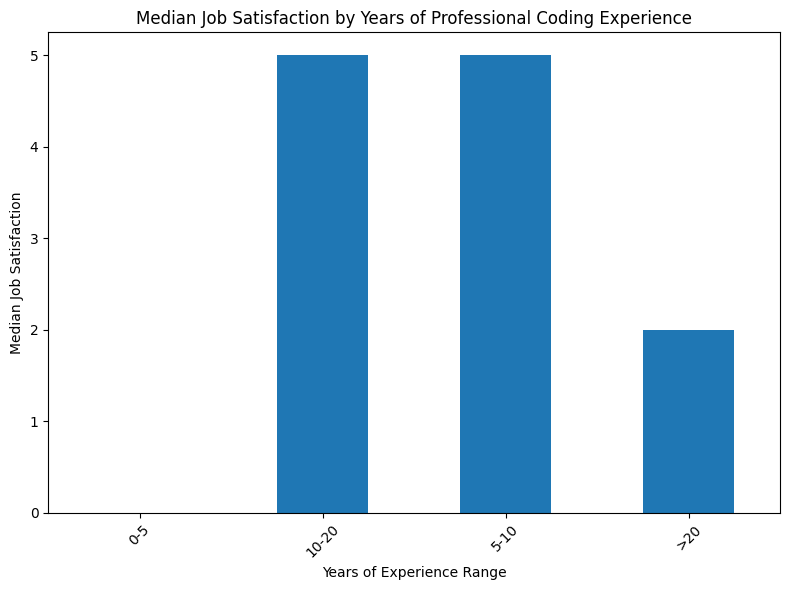

In [7]:
# Calculate median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()
print("Median JobSat by Experience Range:")
print(median_job_sat)

# Visualize the relationship using a bar plot
median_job_sat.plot(kind='bar', figsize=(8, 6))
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience Range')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_15244\778197213.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df_filtered, palette='viridis', order=job_sat_counts.index)


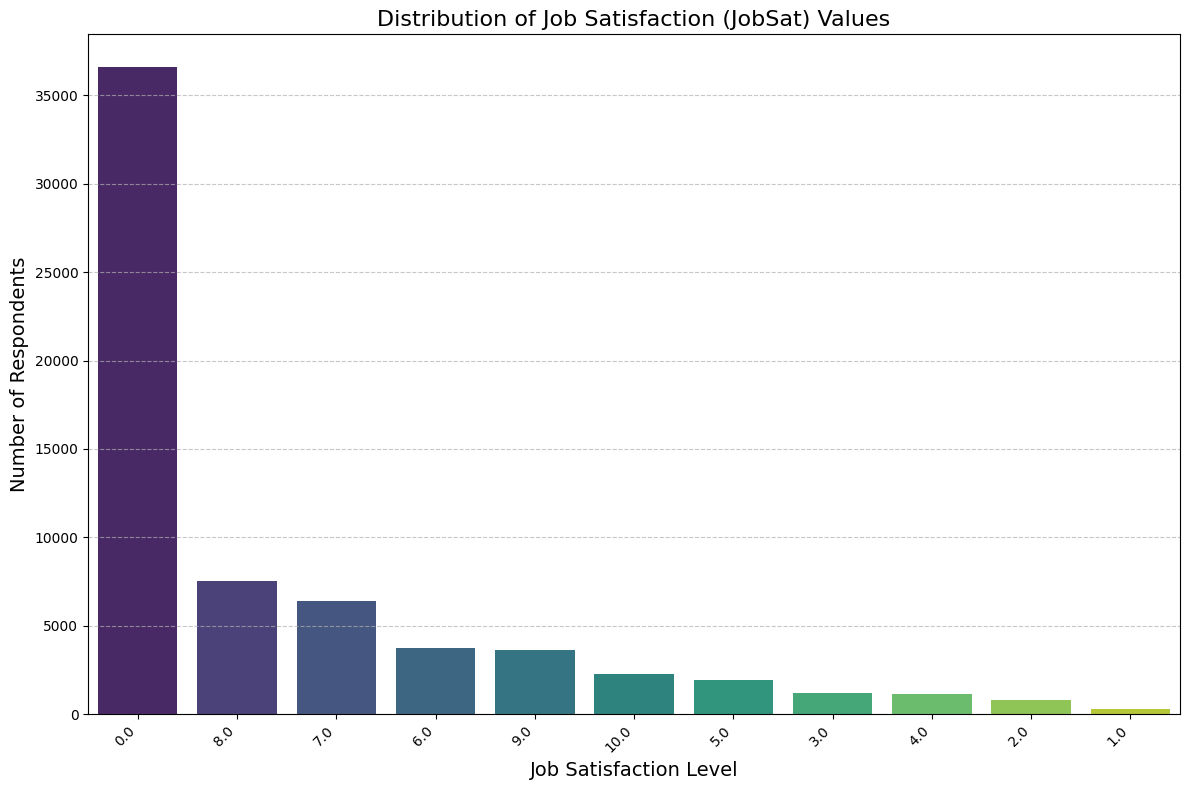

In [9]:
# Group and sort JobSat values to reduce clutter if necessary
job_sat_counts = df['JobSat'].value_counts()
job_sat_counts = job_sat_counts[job_sat_counts > 10]  # Only keep values with more than 10 occurrences

# Create a filtered DataFrame
df_filtered = df[df['JobSat'].isin(job_sat_counts.index)]

# Create a count plot to visualize the distribution of 'JobSat'
plt.figure(figsize=(12, 8))
sns.countplot(x='JobSat', data=df_filtered, palette='viridis', order=job_sat_counts.index)

# Add labels and title
plt.title('Distribution of Job Satisfaction (JobSat) Values', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)

# Improve x-axis by showing fewer ticks
plt.xticks(ticks=range(0, len(job_sat_counts.index), max(1, len(job_sat_counts.index) // 20)),
           labels=job_sat_counts.index[::max(1, len(job_sat_counts.index) // 20)], rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


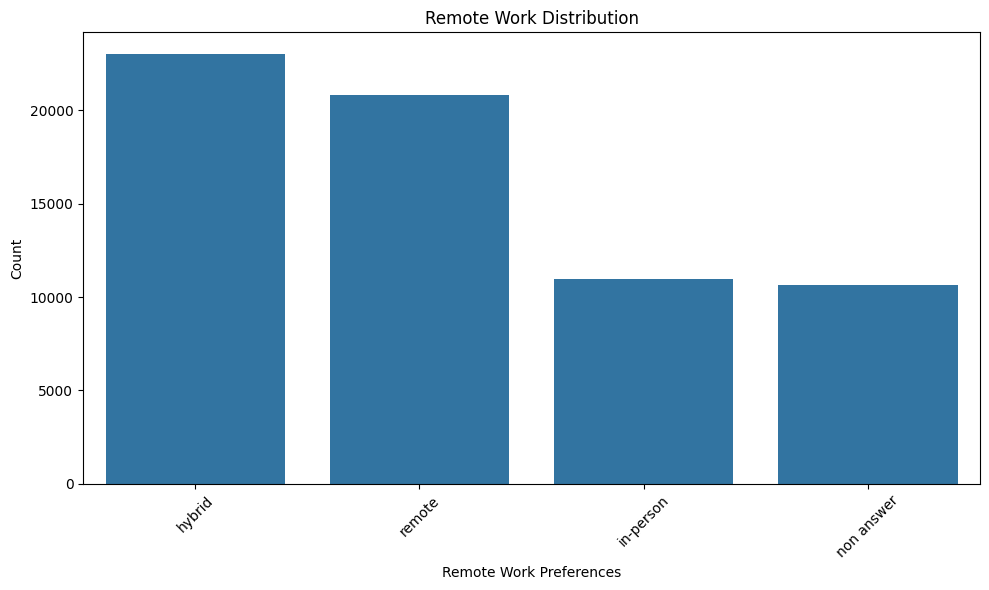

In [10]:
# Count plot for remote work distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Preferences')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
columns = df.columns
columns_Employment = [col for col in columns if col.startswith('Employment_')]
print(columns_Employment)

['Employment_Employedfull-time', 'Employment_Independentcontractorfreelancerorself-employed', 'Employment_Studentfull-time', 'Employment_Employedpart-time', 'Employment_Notemployedbutlookingforwork', 'Employment_Studentpart-time', 'Employment_Notemployedandnotlookingforwork', 'Employment_Retired', 'Employment_Iprefernottosay']


In [12]:
# Create a pivot table
remote_work_crosstab = df.pivot_table(
    index='RemoteWork',
    values=columns_Employment,
    aggfunc='sum'
)

# Swap rows and columns
remote_work_crosstab = remote_work_crosstab.transpose()

# Print the pivot table
print(remote_work_crosstab)

RemoteWork                                          hybrid  in-person  \
Employment_Employedfull-time                         19689       9604   
Employment_Employedpart-time                          1917       1013   
Employment_Independentcontractorfreelancerorsel...    3469        901   
Employment_Iprefernottosay                               0          0   
Employment_Notemployedandnotlookingforwork              27         17   
Employment_Notemployedbutlookingforwork                204         73   
Employment_Retired                                      39         21   
Employment_Studentfull-time                           1219        755   
Employment_Studentpart-time                            822        496   

RemoteWork                                          non answer  remote  
Employment_Employedfull-time                                17   15852  
Employment_Employedpart-time                                 5    1210  
Employment_Independentcontractorfreelancerorsel...

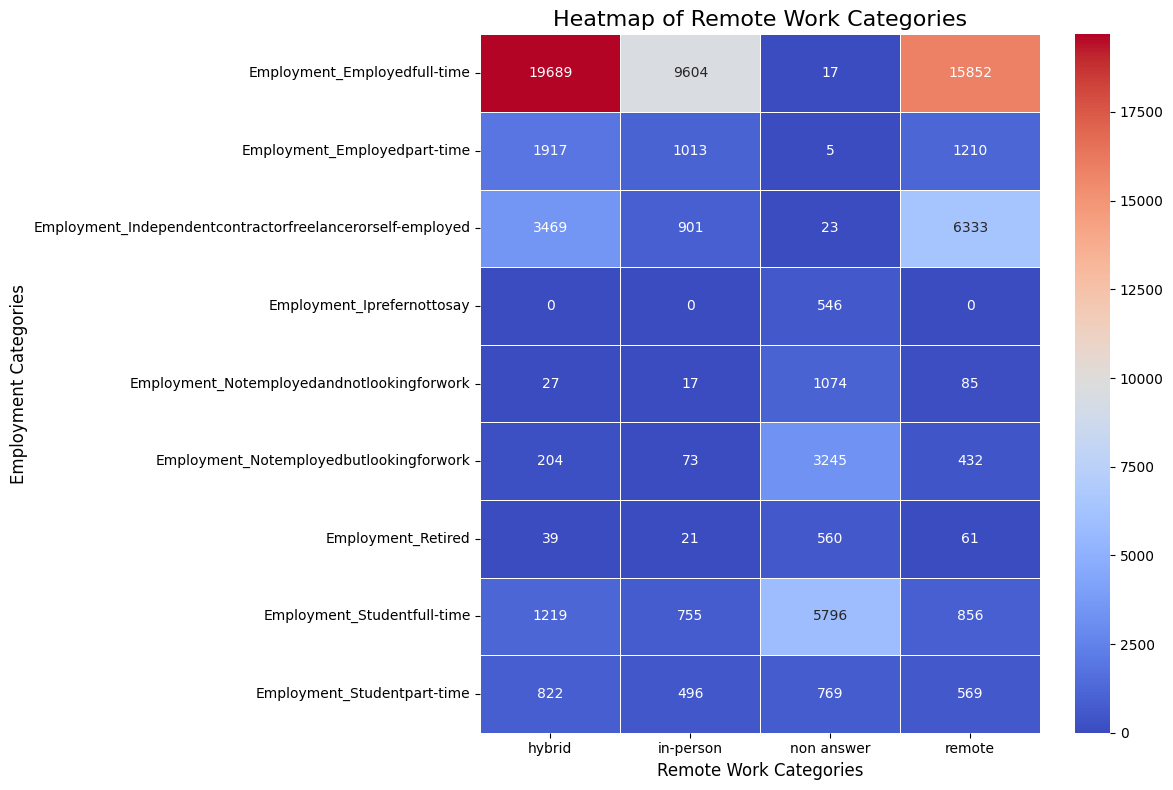

In [13]:
# Create a heatmap from the transposed pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(
    remote_work_crosstab, 
    annot=True, 
    fmt="g", 
    cmap="coolwarm", 
    linewidths=0.5
)

# Set the title and labels
plt.title("Heatmap of Remote Work Categories", fontsize=16)
plt.xlabel("Remote Work Categories", fontsize=12)
plt.ylabel("Employment Categories", fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [14]:
columns = df.columns
columns_LanguageHaveWorkedWith = [col for col in columns if col.startswith('LanguageHaveWorkedWith_')]
print(columns_LanguageHaveWorkedWith)

['LanguageHaveWorkedWith_JavaScript', 'LanguageHaveWorkedWith_HTML/CSS', 'LanguageHaveWorkedWith_Python', 'LanguageHaveWorkedWith_SQL', 'LanguageHaveWorkedWith_TypeScript', 'LanguageHaveWorkedWith_Bash/Shell(allshells)', 'LanguageHaveWorkedWith_Java', 'LanguageHaveWorkedWith_C#', 'LanguageHaveWorkedWith_C++', 'LanguageHaveWorkedWith_C', 'LanguageHaveWorkedWith_PHP', 'LanguageHaveWorkedWith_PowerShell', 'LanguageHaveWorkedWith_Go', 'LanguageHaveWorkedWith_Rust', 'LanguageHaveWorkedWith_Kotlin', 'LanguageHaveWorkedWith_Lua', 'LanguageHaveWorkedWith_Dart', 'LanguageHaveWorkedWith_Assembly', 'LanguageHaveWorkedWith_Ruby', 'LanguageHaveWorkedWith_Swift', 'LanguageHaveWorkedWith_R', 'LanguageHaveWorkedWith_VisualBasic(.Net)', 'LanguageHaveWorkedWith_MATLAB', 'LanguageHaveWorkedWith_VBA', 'LanguageHaveWorkedWith_Groovy', 'LanguageHaveWorkedWith_Scala', 'LanguageHaveWorkedWith_Perl', 'LanguageHaveWorkedWith_GDScript', 'LanguageHaveWorkedWith_Objective-C', 'LanguageHaveWorkedWith_Elixir', 'Lang

In [15]:
# Create a pivot table
country_crosstab = df.pivot_table(
    index='Country',
    values=columns_LanguageHaveWorkedWith,
    aggfunc='sum'
)

# Swap rows and columns
country_crosstab = country_crosstab.transpose()

# Print the pivot table
print(country_crosstab)

Country                                       Afghanistan  Albania  Algeria  \
LanguageHaveWorkedWith_Ada                              9        5        3   
LanguageHaveWorkedWith_Apex                             4        0        1   
LanguageHaveWorkedWith_Assembly                         7        1        7   
LanguageHaveWorkedWith_Bash/Shell(allshells)            0        0        0   
LanguageHaveWorkedWith_C                               36       35       63   
LanguageHaveWorkedWith_C#                               8       12       14   
LanguageHaveWorkedWith_C++                             36       35       63   
LanguageHaveWorkedWith_Clojure                          4        0        0   
LanguageHaveWorkedWith_Cobol                            3        0        0   
LanguageHaveWorkedWith_Crystal                          5        0        1   
LanguageHaveWorkedWith_Dart                             7        0       14   
LanguageHaveWorkedWith_Delphi                       

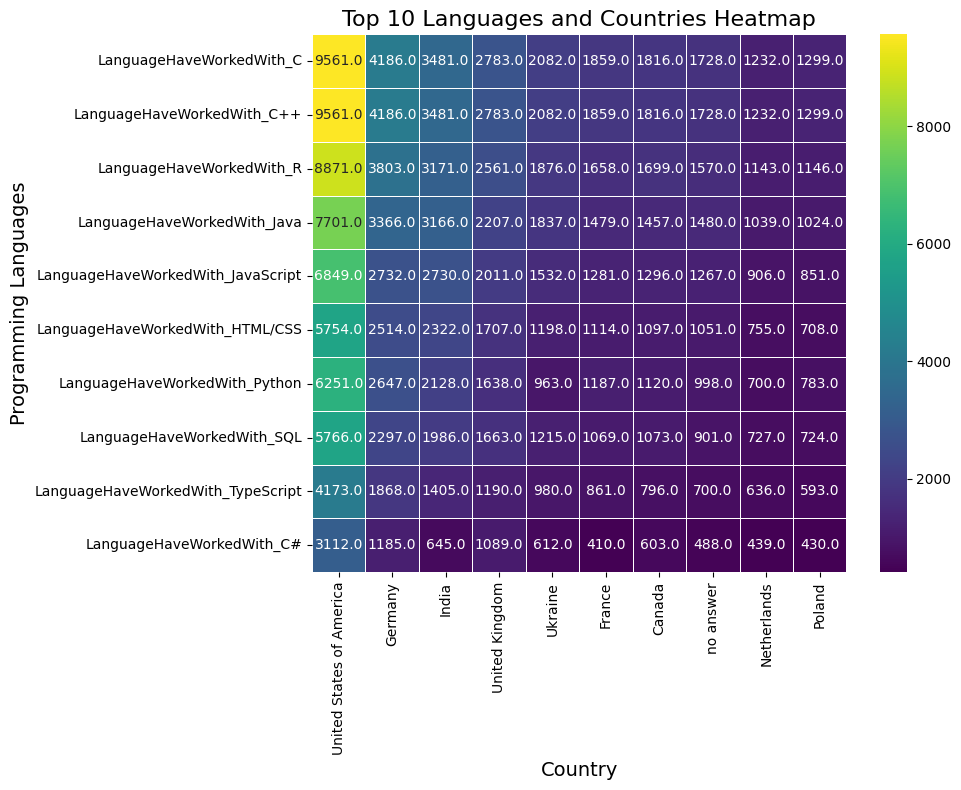

In [16]:
# Aggregate data to find the top 10 countries and languages
top_countries = country_crosstab.sum(axis=0).nlargest(10).index  # Top 10 countries
top_languages = country_crosstab.sum(axis=1).nlargest(10).index  # Top 10 languages

# Select subset of data
subset = country_crosstab.loc[top_languages, top_countries]

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset, cmap='viridis', annot=True, fmt=".1f", linewidths=0.5)

# Set title and labels
plt.title('Top 10 Languages and Countries Heatmap', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Programming Languages', fontsize=14)

# Show heatmap
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


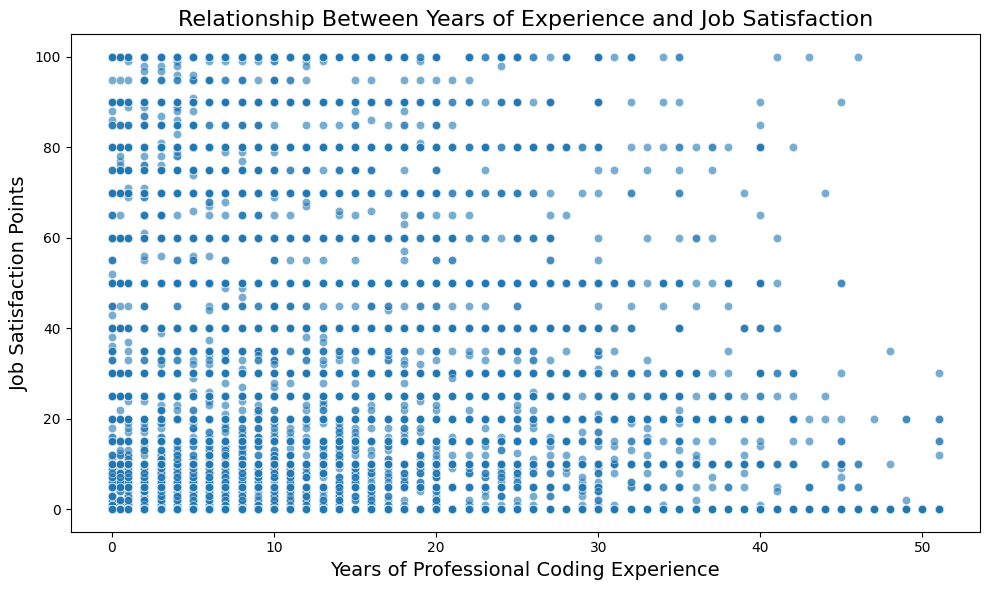

In [17]:
# Scatter plot of YearsCodePro vs JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6)

# Set plot title and labels
plt.title('Relationship Between Years of Experience and Job Satisfaction', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=14)
plt.ylabel('Job Satisfaction Points', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

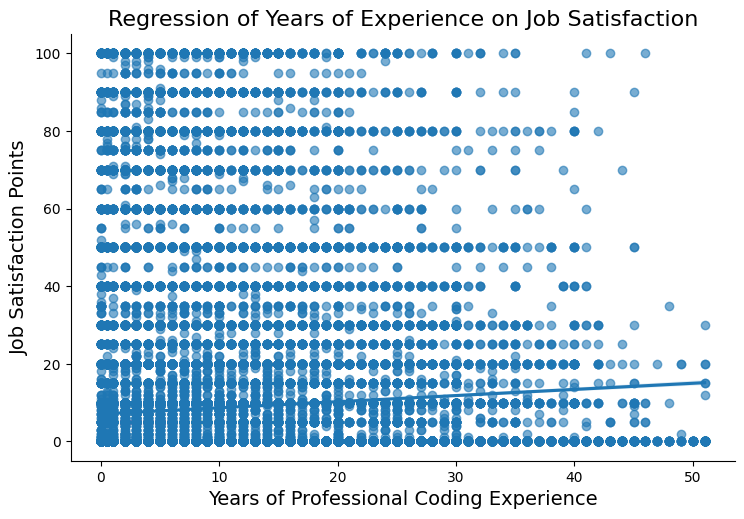

In [18]:
sns.lmplot(data=df, x='YearsCodePro', y='JobSatPoints_1', aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Regression of Years of Experience on Job Satisfaction', fontsize=16)
plt.xlabel('Years of Professional Coding Experience', fontsize=14)
plt.ylabel('Job Satisfaction Points', fontsize=14)
plt.show()

In [19]:
correlation = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.07296717024188996


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [20]:
# Create a pivot table
edlevel_crosstab = df.pivot_table(
    index='EdLevel',
    values=columns_Employment,
    aggfunc='sum'
)

# Swap rows and columns
edlevel_crosstab = edlevel_crosstab.transpose()

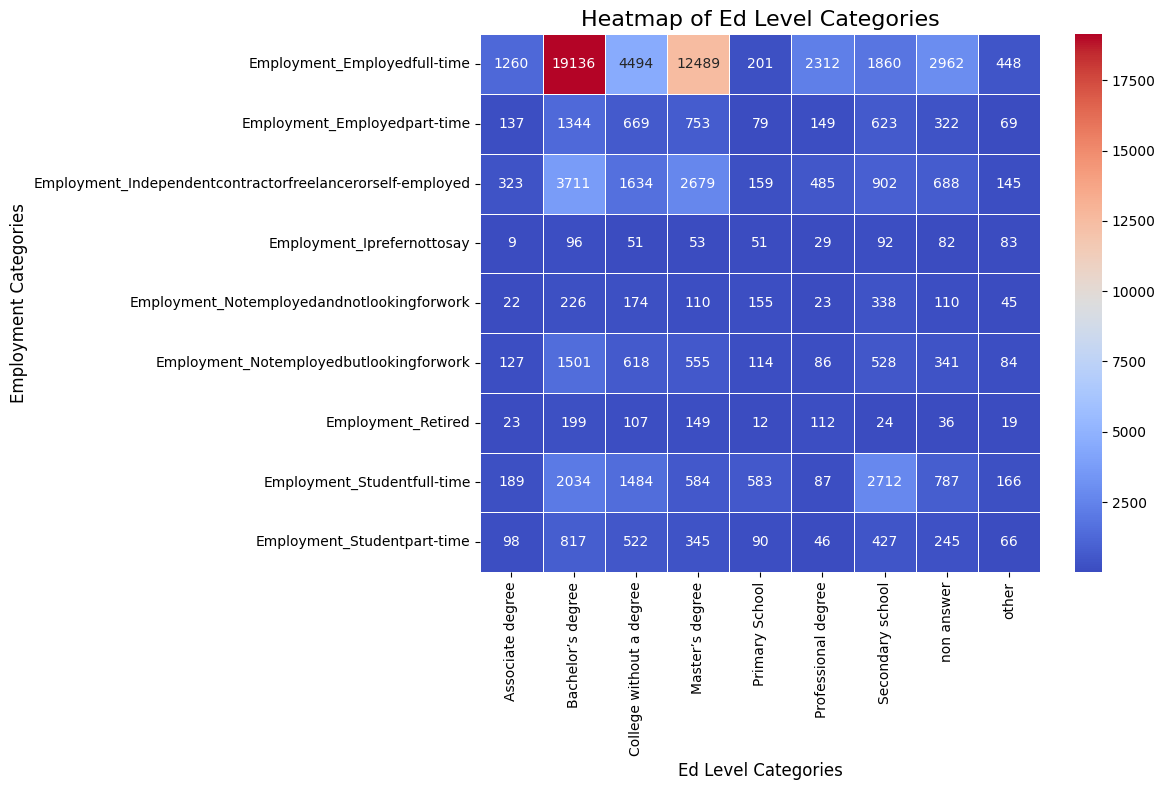

In [21]:
# Create a heatmap from the transposed pivot table
plt.figure(figsize=(12, 8))
sns.heatmap(
    edlevel_crosstab, 
    annot=True, 
    fmt="g", 
    cmap="coolwarm", 
    linewidths=0.5
)

# Set the title and labels
plt.title("Heatmap of Ed Level Categories", fontsize=16)
plt.xlabel("Ed Level Categories", fontsize=12)
plt.ylabel("Employment Categories", fontsize=12)

# Show the heatmap
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [22]:
## Write your code here

: 

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
